In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import pickle

from sklearn import preprocessing, decomposition, model_selection, linear_model, neighbors, ensemble

# Récupération des trimestres clusterisés et leurs centroïdes

In [2]:
dict_clustered_quarters = pickle.load(open("pickle_dict_clustered_quarters.pkl", "rb"))
dict_centroids_quarters = pickle.load(open("pickle_dict_centroids_quarters.pkl", "rb"))
grouped_categories = pickle.load(open("pickle_grouped_categories.pkl", "rb"))

# Etude du dernier trimestre complet

In [3]:
# premières informations sur les clusters
ref = "2018Q2"
data = dict_clustered_quarters[ref]
print(data["cluster"].value_counts())
dict_centroids_quarters[ref]


2    13180
3     3735
1     2092
0      384
Name: cluster, dtype: int64


,city_rank,orders_count,review_score_mean,review_user,nb_items,total_spent,mean_spent,body,electronic_computers,cars,...,food,family_pets,clothes_fashion,art_music_books,professionnal,boleto,credit_card,debit_card,voucher,not_defined
0,2.484375,1.664062,3.892795,0.877604,3.546875,409.863724,130.683289,0.236979,0.281250,0.057292,...,0.156250,9.635417e-02,0.127604,0.044271,0.236979,2.942708e-01,1.299479e+00,0.028646,1.328125e-01,0.0
1,2.390535,1.000000,4.241874,0.432600,1.112333,419.658255,394.979886,0.033461,0.046367,0.022945,...,0.000478,7.829828e-01,0.003346,0.026769,0.024379,2.198853e-02,9.665392e-01,0.005736,6.405354e-02,0.0
2,2.506753,1.000000,4.235053,0.448179,1.120182,132.630112,121.545771,0.165175,0.158649,0.052200,...,0.014643,9.020562e-16,0.027845,0.032853,0.051821,2.498002e-15,9.846737e-01,0.000076,6.191199e-02,0.0
3,2.365997,1.000000,4.277376,0.440428,1.122892,131.259473,119.403159,0.145649,0.183668,0.051673,...,0.020884,6.773762e-02,0.022490,0.041499,0.055957,9.202142e-01,2.664535e-15,0.080054,-1.804112e-16,0.0


On constate que le cluster 0 (854 clients) est caractérisé par un dépense moyenne plus importante et l'utilisation de la carte de crédit.  
Le cluster 2 (3933 clients) correspond à une somme plus petite et le paiment par boleto.  
Les clusters 1 et 3 (respectivement 14143 et 461 clients) correspondent à une somme plus petite et un paiement par carte de crédit, il faut les séparer sur un autre critère.


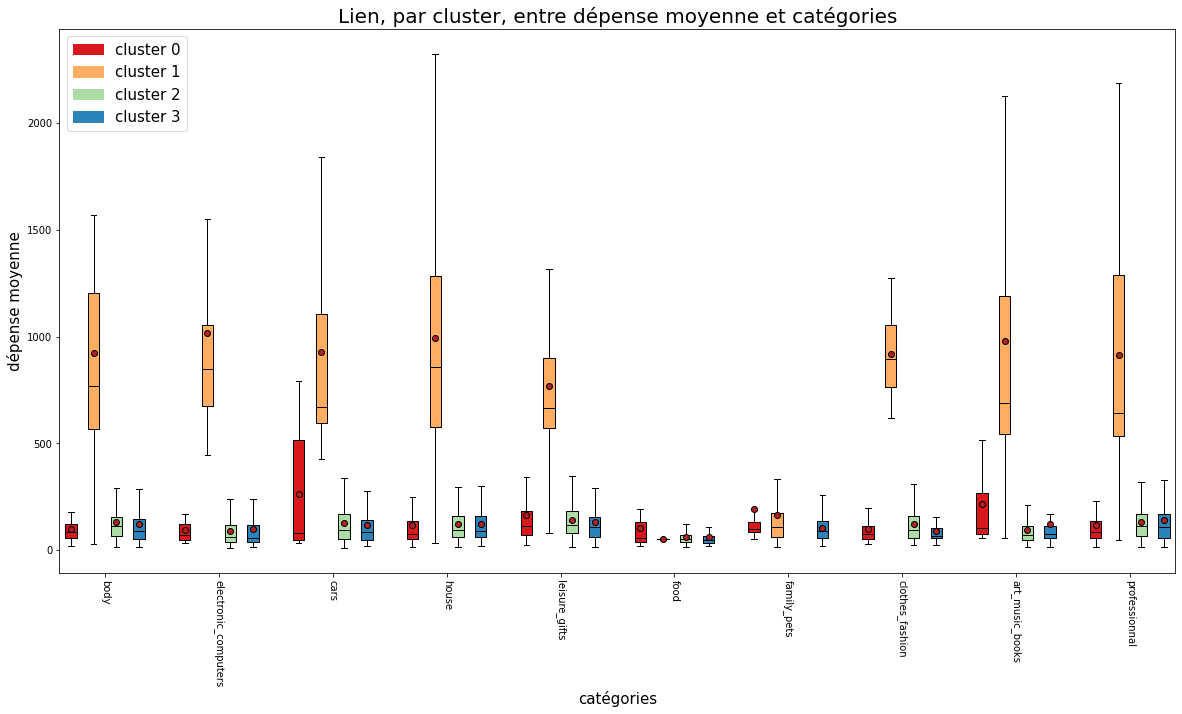

In [4]:
# visualisation des dépenses moyennes par catégorie et par cluster

list_categories = grouped_categories.keys()

colors = ["#d7191c", "#fdae61", "#abdda4", "#2b83ba"]

groupes_0 = list()
groupes_1 = list()
groupes_2 = list()
groupes_3 = list()
for cat in list_categories:
    groupes_0.append(data.loc[((data[cat]!=0)&(data["cluster"]==0)), "mean_spent"])
    groupes_1.append(data.loc[((data[cat]!=0)&(data["cluster"]==1)), "mean_spent"])
    groupes_2.append(data.loc[((data[cat]!=0)&(data["cluster"]==2)), "mean_spent"])
    groupes_3.append(data.loc[((data[cat]!=0)&(data["cluster"]==3)), "mean_spent"])
groupes_0 = np.array(groupes_0, dtype=object)
groupes_1 = np.array(groupes_1, dtype=object)
groupes_2 = np.array(groupes_2, dtype=object)
groupes_3 = np.array(groupes_3, dtype=object)

fig, ax = plt.subplots(1, 1, figsize=(20,10))
ax.set_title("Lien, par cluster, entre dépense moyenne et catégories", fontsize=20)
ax.set_ylabel("dépense moyenne", fontsize=15)
ax.set_xlabel("catégories", fontsize=15)
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
boxprops = {'facecolor' : colors[0]}
ax.boxplot(groupes_0, showfliers=False, medianprops=medianprops, meanprops=meanprops,
           boxprops=boxprops, positions=np.arange(1,51,5),
            vert=True, patch_artist=True, showmeans=True)
boxprops = {'facecolor' : colors[1]}
ax.boxplot(groupes_1, showfliers=False, medianprops=medianprops, meanprops=meanprops,
           boxprops=boxprops, positions=np.arange(2,51,5),
            vert=True, patch_artist=True, showmeans=True)
boxprops = {'facecolor' : colors[2]}
ax.boxplot(groupes_2, showfliers=False, medianprops=medianprops, meanprops=meanprops,
           boxprops=boxprops, positions=np.arange(3,51,5),
            vert=True, patch_artist=True, showmeans=True)
boxprops = {'facecolor' : colors[3]}
ax.boxplot(groupes_3, showfliers=False, medianprops=medianprops, meanprops=meanprops,
           boxprops=boxprops, positions=np.arange(4,51,5),
            vert=True, patch_artist=True, showmeans=True)
ax.set_xticks(np.arange(2.5,51,5))
ax.set_xticklabels(list_categories, rotation=-90)
plt.legend([mpl.patches.Rectangle((0,0),2,4,color=colors[0]), 
            mpl.patches.Rectangle((0,0),2,4,color=colors[1]), 
            mpl.patches.Rectangle((0,0),1,2,color=colors[2]),
            mpl.patches.Rectangle((0,0),1,2,color=colors[3])],
           ["cluster 0", "cluster 1", "cluster 2", "cluster 3"], fontsize = 15)
plt.savefig("img/lien_mean_spent_cat.png", bbox_inches="tight")
plt.show()

In [5]:
# tableau de contingence des catégories par cluster

table = pd.pivot_table(data, values=list_categories, index="cluster", aggfunc=np.sum)
table["total"] = table.sum(axis=1)
table

,art_music_books,body,cars,clothes_fashion,electronic_computers,family_pets,food,house,leisure_gifts,professionnal,total
cluster,,,,,,,,,,,
0,17,91,22,49,108,37,60,733,154,91,1362
1,56,70,48,7,97,1638,1,195,164,51,2327
2,433,2177,688,367,2091,0,193,5114,3018,683,14764
3,155,544,193,84,686,253,78,1266,726,209,4194


In [6]:
# tableau des fréquences en ligne

table_freq = table.copy()
for i in range(table.shape[0]):
    table_freq.iloc[i] = table.iloc[i]*100/table.iloc[i,-1]
    
table_freq

,art_music_books,body,cars,clothes_fashion,electronic_computers,family_pets,food,house,leisure_gifts,professionnal,total
cluster,,,,,,,,,,,
0,1.248164,6.681351,1.615272,3.597651,7.929515,2.716593,4.405286,53.817915,11.306902,6.681351,100.0
1,2.406532,3.008165,2.062742,0.300817,4.168457,70.391061,0.042974,8.379888,7.047701,2.191663,100.0
2,2.932810,14.745326,4.659984,2.485776,14.162829,0.000000,1.307234,34.638309,20.441615,4.626118,100.0
3,3.695756,12.970911,4.601812,2.002861,16.356700,6.032427,1.859800,30.185980,17.310443,4.983309,100.0


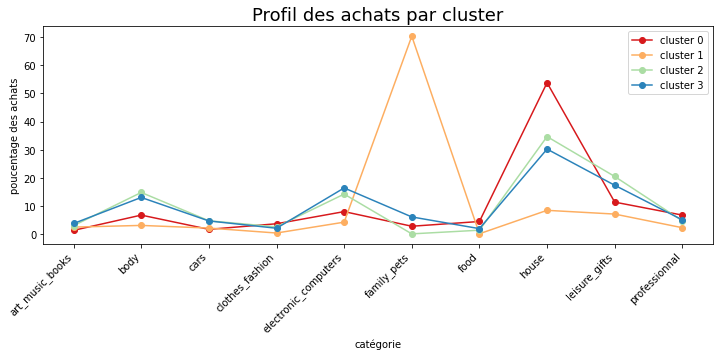

In [7]:
# visualisation des profils de clients

fig,ax = plt.subplots(1,1, figsize=(12,4))
for i in range(4):
    ax.plot(range(10), table_freq.iloc[i,range(10)].values, c=colors[i],marker='o', label=f"cluster {i}")
ax.set_ylabel("poucentage des achats")
ax.set_xlabel("catégorie")
ax.set_xticks(range(10))
ax.set_xticklabels(list(table_freq.columns[:-1]), rotation=45, ha="right")
plt.title("Profil des achats par cluster", fontsize=18)
plt.legend()
plt.savefig("img/clusters_profiles.png", bbox_inches="tight")

In [8]:
list(table_freq.columns[:-1])

['art_music_books',
 'body',
 'cars',
 'clothes_fashion',
 'electronic_computers',
 'family_pets',
 'food',
 'house',
 'leisure_gifts',
 'professionnal']

Le cluster 3 correspond donc à des clients qui achètent quasi exclusivement des vêtements et accessoires de mode.  
On constate que les clients du cluster 1 achètent majoritairement pour la maison.  
Les clusters 1 et 2 ont des achats globalement plus répartis (mais pas de vêtements).

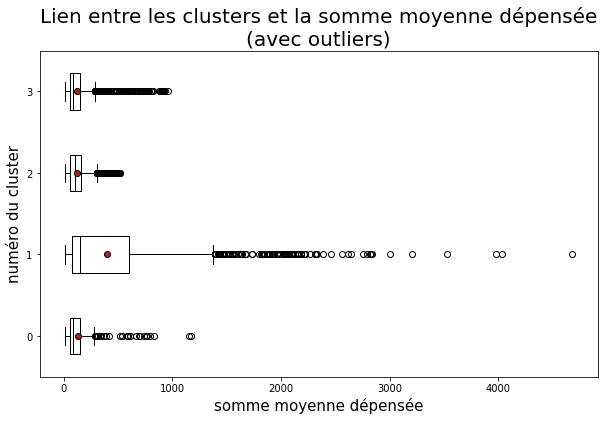

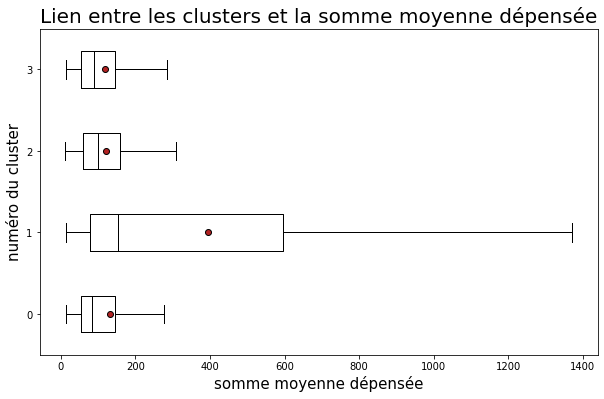

0.1681447641869989

In [9]:
# ANOVA entre la somme moyenne dépensée et les clusters

data = dict_clustered_quarters["2018Q2"]

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT

quali = "cluster" 
quanti = "mean_spent" 

modalites = data[quali].unique()
modalites.sort()
groupes = []
for m in modalites:
    groupes.append(data.loc[data[quali]==m, quanti])
    
groupes = np.array(groupes, dtype=object)
modalites = [m for m in modalites]

medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}

fig, ax = plt.subplots(1, 1, figsize=(10,6))

ax.set_title("Lien entre les clusters et la somme moyenne dépensée\n(avec outliers)", fontsize=20)
ax.set_xlabel("somme moyenne dépensée", fontsize=15)
ax.set_ylabel("numéro du cluster", fontsize=15)

ax.boxplot(groupes, labels=modalites, showfliers=True, medianprops=medianprops, 
            vert=False, patch_artist=False, showmeans=True, meanprops=meanprops)

plt.show()

fig, ax = plt.subplots(1, 1, figsize=(10,6))

ax.set_title("Lien entre les clusters et la somme moyenne dépensée", fontsize=20)
ax.set_xlabel("somme moyenne dépensée", fontsize=15)
ax.set_ylabel("numéro du cluster", fontsize=15)

ax.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=False, showmeans=True, meanprops=meanprops)
plt.savefig("img/anova_mean_spent.png", bbox_inches="tight")
plt.show()

eta_squared(data[quali], data[quanti])

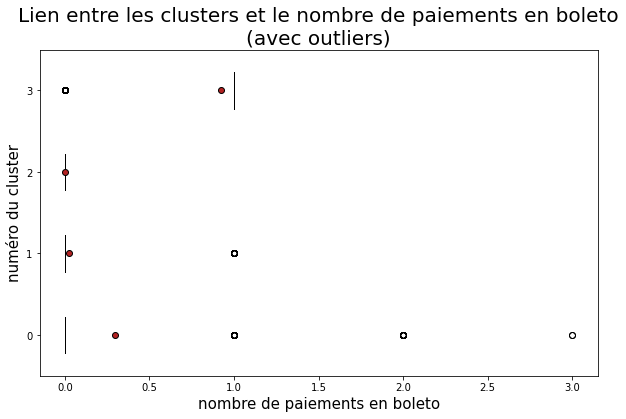

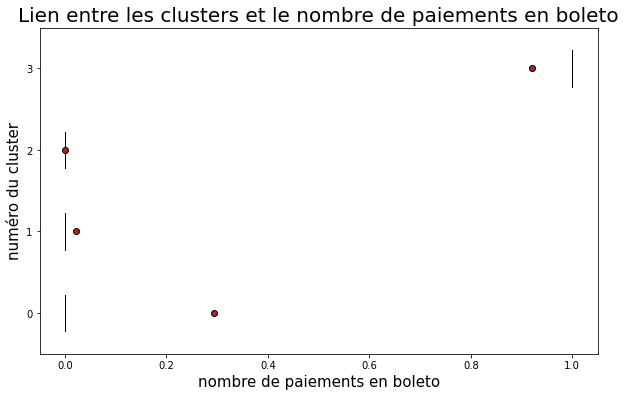

0.843634898451281

In [10]:
# ANOVA entre les clusters et le nombre paiement en boleto

quali = "cluster" 
quanti = "boleto" 

modalites = data[quali].unique()
modalites.sort()
groupes = []
for m in modalites:
    groupes.append(data.loc[data[quali]==m, quanti])
    
groupes = np.array(groupes, dtype=object)
modalites = [m for m in modalites]

medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}

fig, ax = plt.subplots(1, 1, figsize=(10,6))

ax.set_title("Lien entre les clusters et le nombre de paiements en boleto\n(avec outliers)", fontsize=20)
ax.set_xlabel("nombre de paiements en boleto", fontsize=15)
ax.set_ylabel("numéro du cluster", fontsize=15)

ax.boxplot(groupes, labels=modalites, showfliers=True, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)

plt.show()

fig, ax = plt.subplots(1, 1, figsize=(10,6))

ax.set_title("Lien entre les clusters et le nombre de paiements en boleto", fontsize=20)
ax.set_xlabel("nombre de paiements en boleto", fontsize=15)
ax.set_ylabel("numéro du cluster", fontsize=15)

ax.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.savefig("img/anova_boleto.png", bbox_inches="tight")
plt.show()

eta_squared(data[quali], data[quanti])

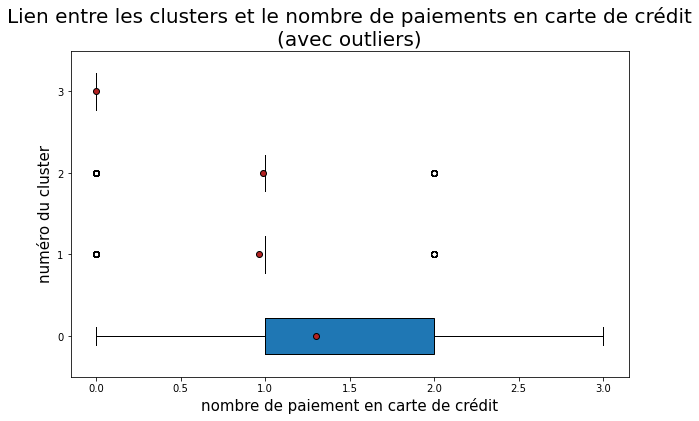

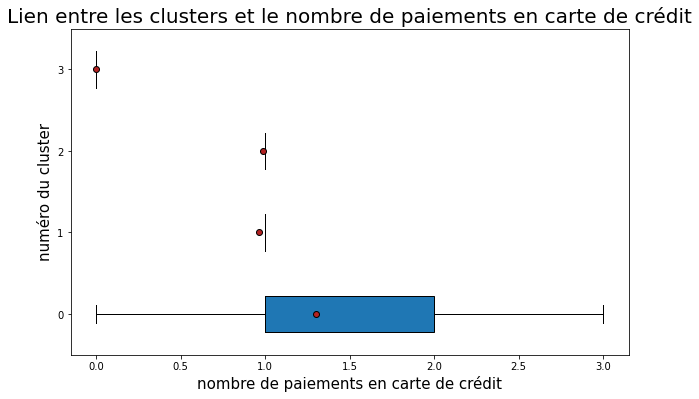

0.8318559902392665

In [11]:
# ANOVA entre les clusters et le nombre paiement en carte de crédit

quali = "cluster" 
quanti = "credit_card" 

modalites = data[quali].unique()
modalites.sort()
groupes = []
for m in modalites:
    groupes.append(data.loc[data[quali]==m, quanti])
    
groupes = np.array(groupes, dtype=object)
modalites = [m for m in modalites]

medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}

fig, ax = plt.subplots(1, 1, figsize=(10,6))

ax.set_title("Lien entre les clusters et le nombre de paiements en carte de crédit\n(avec outliers)", fontsize=20)
ax.set_xlabel("nombre de paiement en carte de crédit", fontsize=15)
ax.set_ylabel("numéro du cluster", fontsize=15)

ax.boxplot(groupes, labels=modalites, showfliers=True, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)

plt.show()

fig, ax = plt.subplots(1, 1, figsize=(10,6))

ax.set_title("Lien entre les clusters et le nombre de paiements en carte de crédit", fontsize=20)
ax.set_xlabel("nombre de paiements en carte de crédit", fontsize=15)
ax.set_ylabel("numéro du cluster", fontsize=15)

ax.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.savefig("img/anova_credit_card.png", bbox_inches="tight")
plt.show()

eta_squared(data[quali], data[quanti])

In [12]:
# homogénéité de chaque cluster

def tightness(points, centroid):
    """
    Cette fonction reçoit en paramètres les points d'un cluster et son centroïde
    et renvoie la valeur de son homogénéité (moyenne des distances de chacun des points au centroïde)
    """    
    cum_dist = ((points - centroid)**2).sum().sum()
    nb_points = points.shape[0]
    return cum_dist / nb_points

scaler = preprocessing.StandardScaler()
scaled_data = scaler.fit_transform(data.iloc[:,:-1])
scaled_centroids = scaler.transform(dict_centroids_quarters[ref])
clusters_tightness = pd.Series(index=range(4), dtype="float")
for i in range(4):
    points = scaled_data[data["cluster"]==i]
    centroid = scaled_centroids[i]
    tgh = tightness(points, centroid)
    print(f"L'homogénéité du cluster {i} est {tgh:.3f}")
    clusters_tightness[i] = tgh
    
df = dict_centroids_quarters[ref].loc[:,["mean_spent", "boleto", "credit_card"]]
df["nb_customers"] = data["cluster"].value_counts()
df["tightness"] = clusters_tightness
df.index.rename("cluster", inplace=True)
df

L'homogénéité du cluster 0 est 131.078
L'homogénéité du cluster 1 est 23.864
L'homogénéité du cluster 2 est 12.853
L'homogénéité du cluster 3 est 17.599


,mean_spent,boleto,credit_card,nb_customers,tightness
cluster,,,,,
0,130.683289,2.942708e-01,1.299479e+00,384,131.078334
1,394.979886,2.198853e-02,9.665392e-01,2092,23.863937
2,121.545771,2.498002e-15,9.846737e-01,13180,12.852578
3,119.403159,9.202142e-01,2.664535e-15,3735,17.599106


#### Conclusion :
Les clusters sont bien définis et identifiés, le cluster 0 est cependant beaucoup moins homogène que les trois autres.

# Etude de l'évolution des clusters

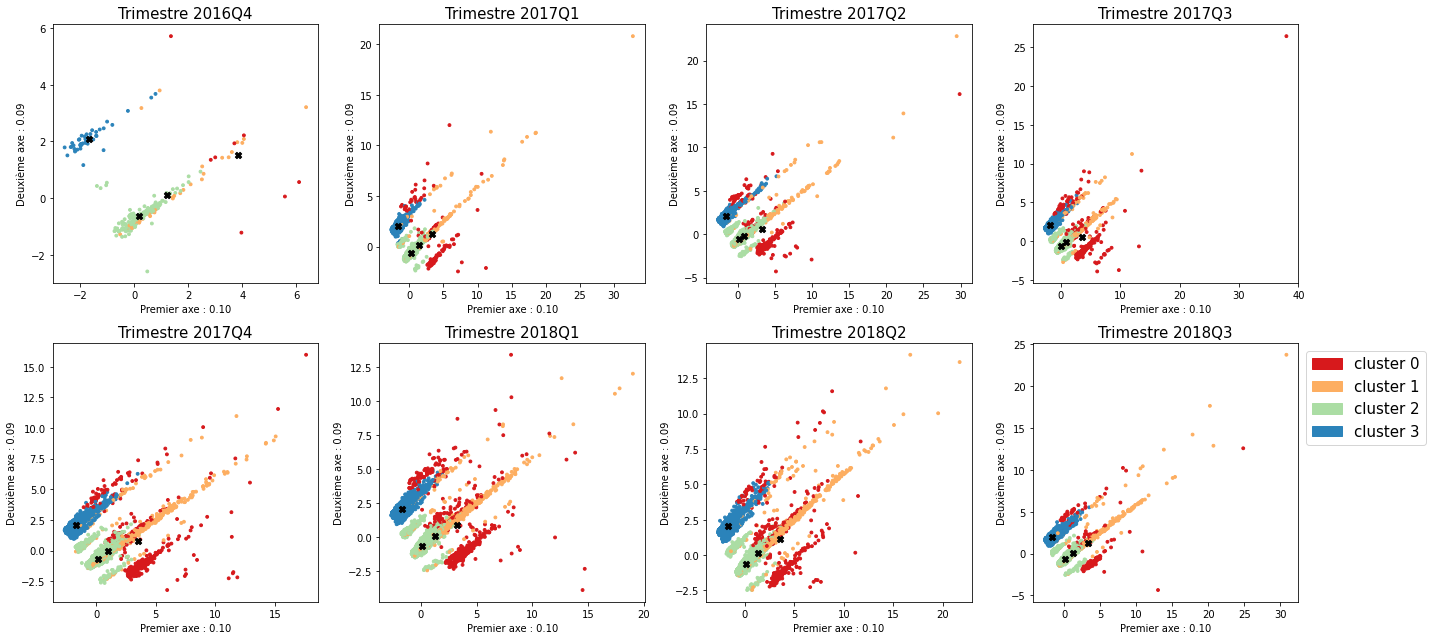

In [13]:
# visualisation des trimestres avec l'ACP du 2ème trimestre de 2018

dict_colors = {0 : colors[0], 
               1 : colors[1], 
               2 : colors[2], 
               3 : colors[3]}

ref = "2018Q2"
ref_df = dict_clustered_quarters[ref]
scaled_data = scaler.fit_transform(ref_df.iloc[:,:-1])
pca = decomposition.PCA(n_components=2)
pca.fit(scaled_data)
fig, axes = plt.subplots(2, 4,figsize=(20,9))
axes = axes.ravel()
i = 0
for key, df in dict_clustered_quarters.items():
    scaled_data = scaler.transform(df.iloc[:,:-1])
    data_pca = pca.transform(scaled_data)
    ratios = pca.explained_variance_ratio_
    ax = axes[i]
    i += 1
    ax.scatter(data_pca[:, 0], data_pca[:, 1], c=df.iloc[:,-1].replace(dict_colors), s=8)
    centr_norm = scaler.transform(dict_centroids_quarters[key])
    centr_pca = pca.transform(centr_norm)
    ax.scatter(centr_pca[:, 0], centr_pca[:, 1], c='k', s=40, marker='X')
    ax.set_xlabel("Premier axe : %.2f"%(ratios[0]))
    ax.set_ylabel("Deuxième axe : %.2f"%(ratios[1]))
    ax.set_title(f"Trimestre {key}", fontsize=15)
plt.legend([mpl.patches.Rectangle((0,0),2,4,color=colors[0]), 
            mpl.patches.Rectangle((0,0),2,4,color=colors[1]), 
            mpl.patches.Rectangle((0,0),1,2,color=colors[2]),
            mpl.patches.Rectangle((0,0),1,2,color=colors[3])],
           ["cluster 0", "cluster 1", "cluster 2", "cluster 3"],
           fontsize = 15, bbox_to_anchor=(1, 1))
fig.tight_layout()
plt.savefig("img/evolution.png", bbox_inches="tight")
plt.show()

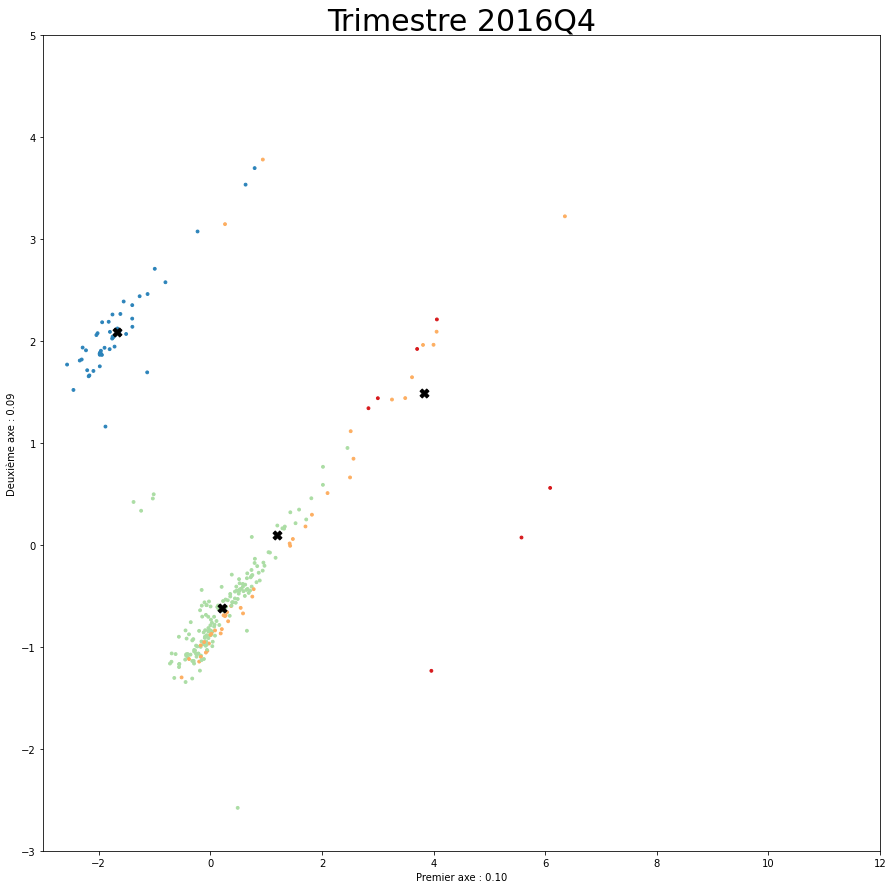

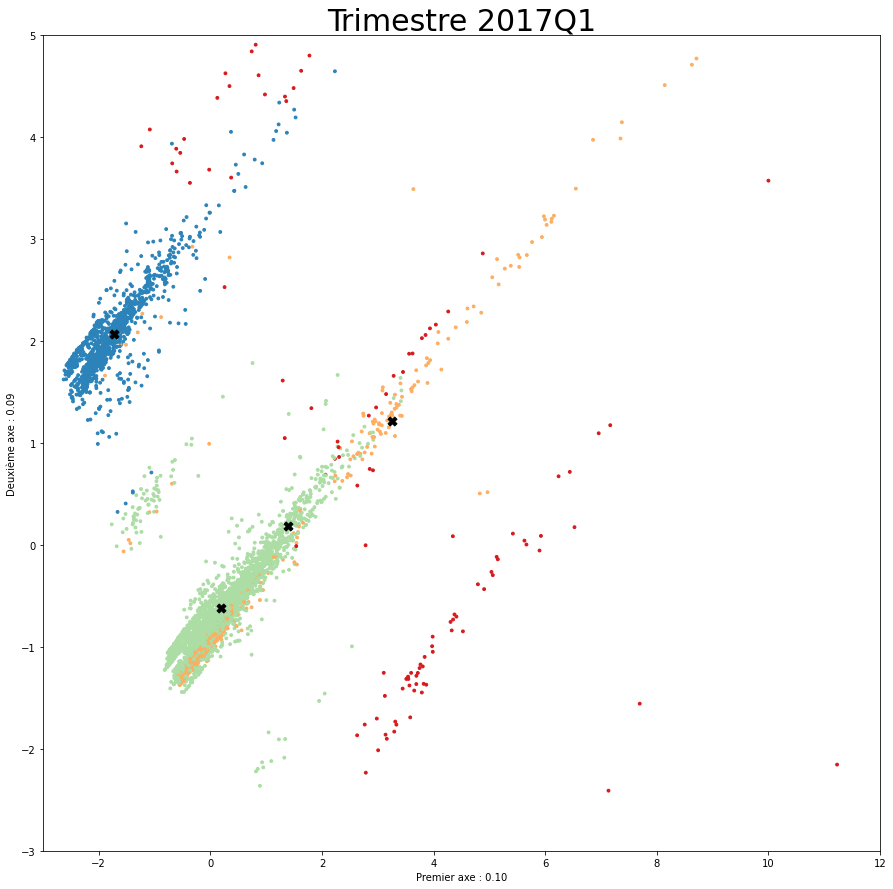

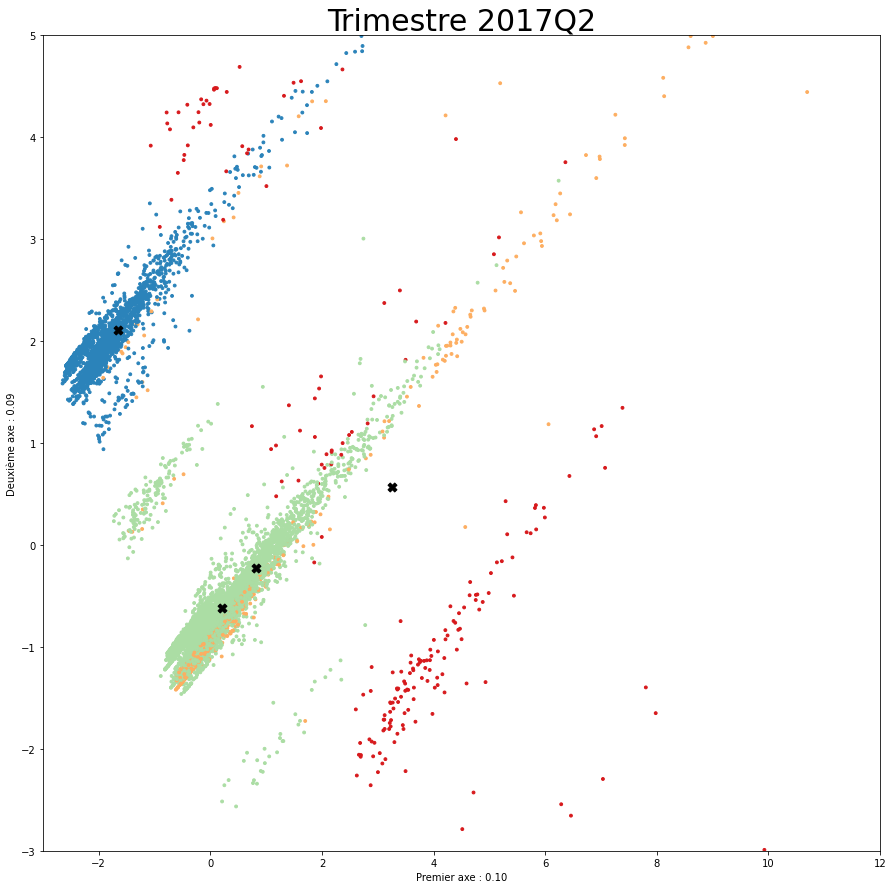

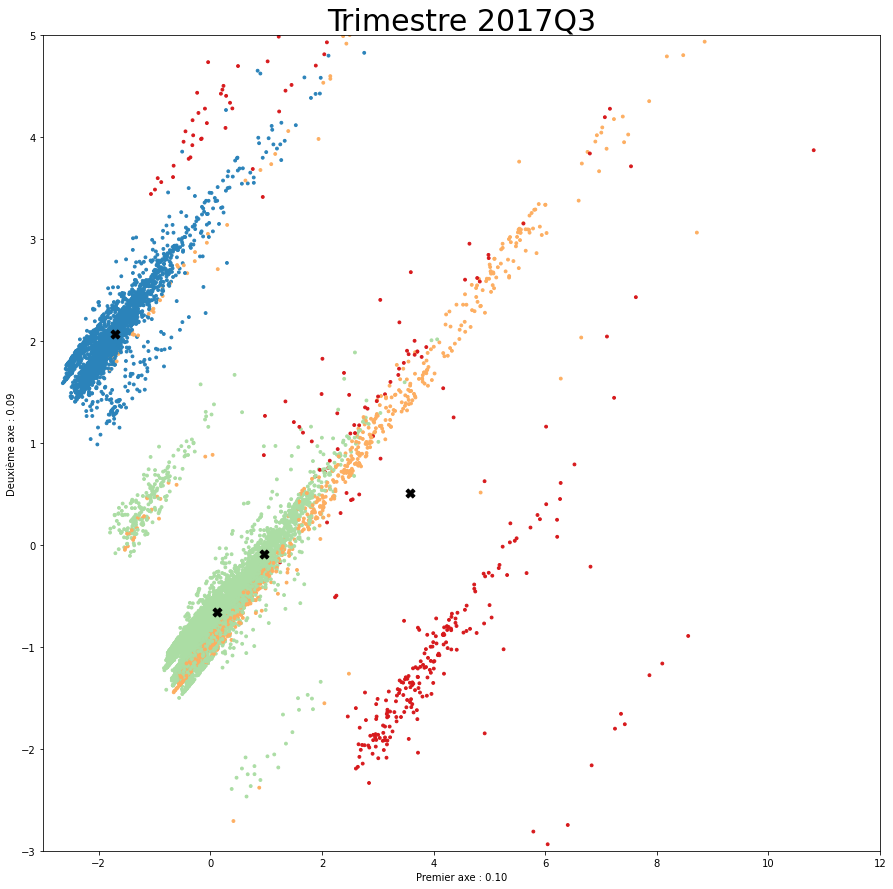

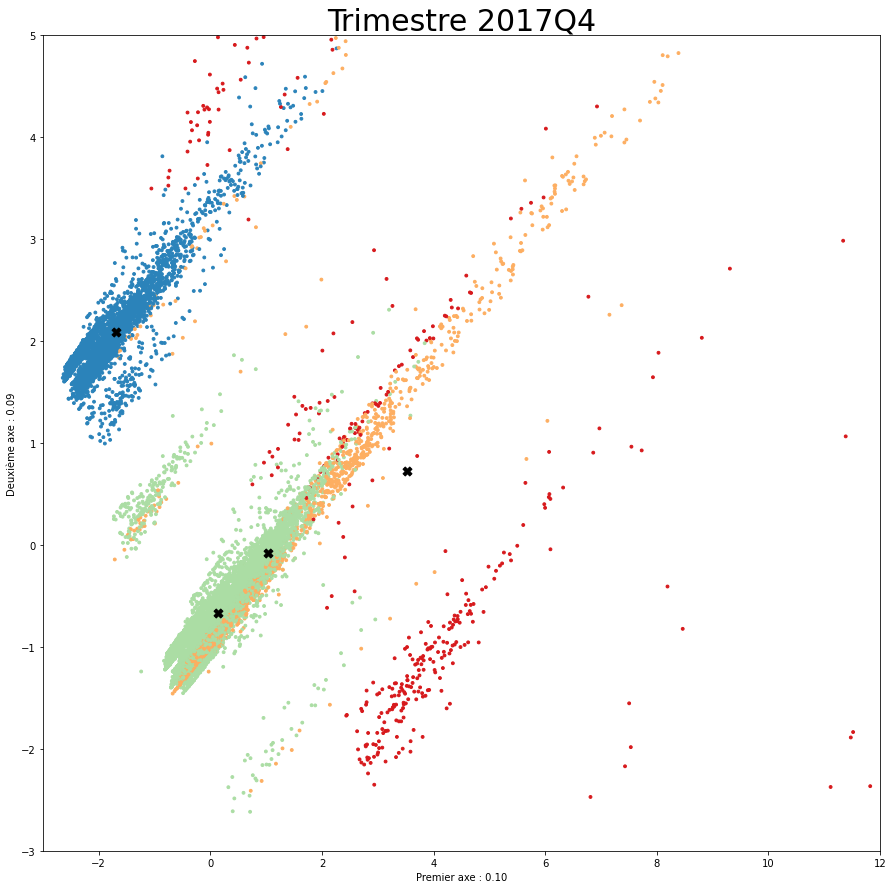

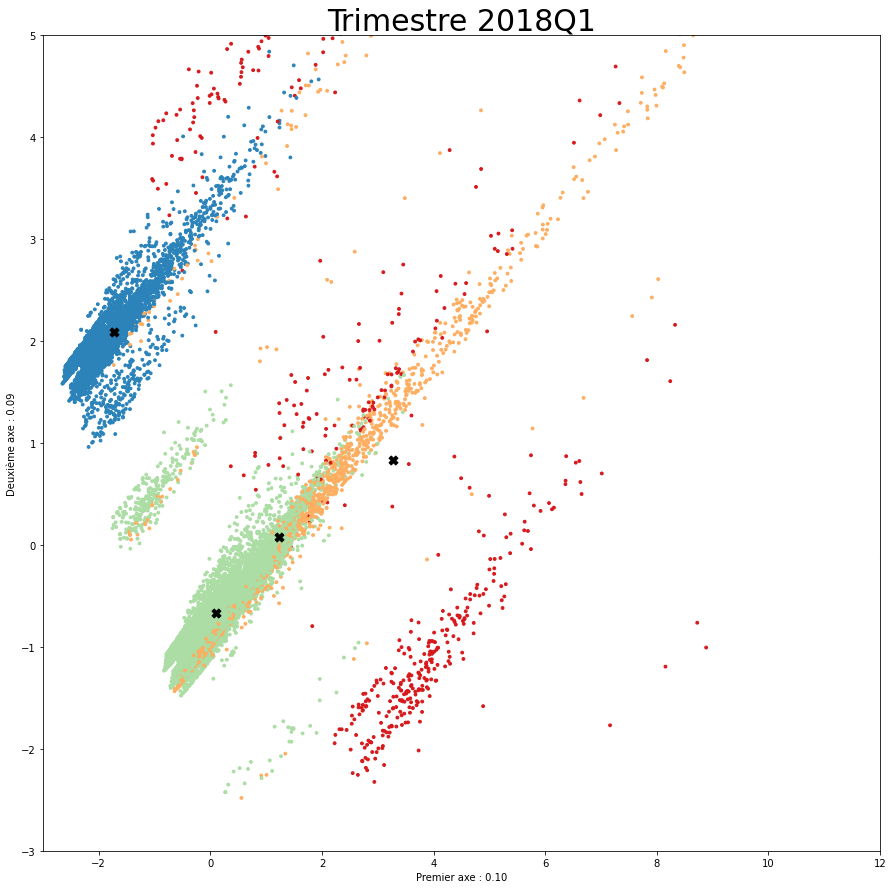

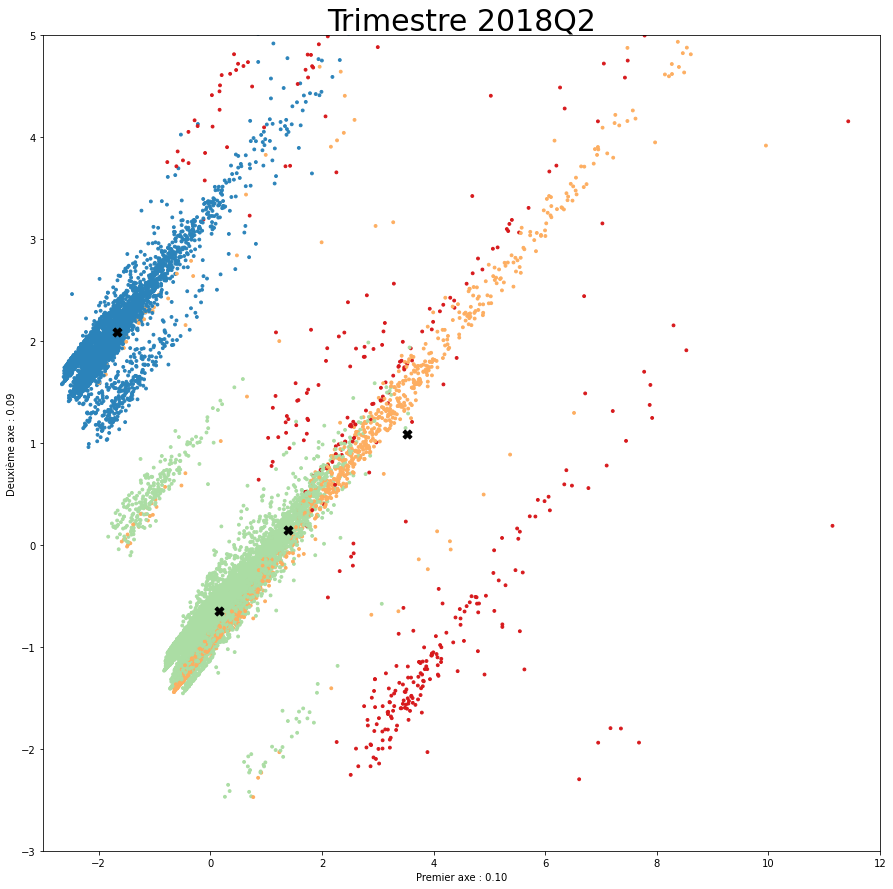

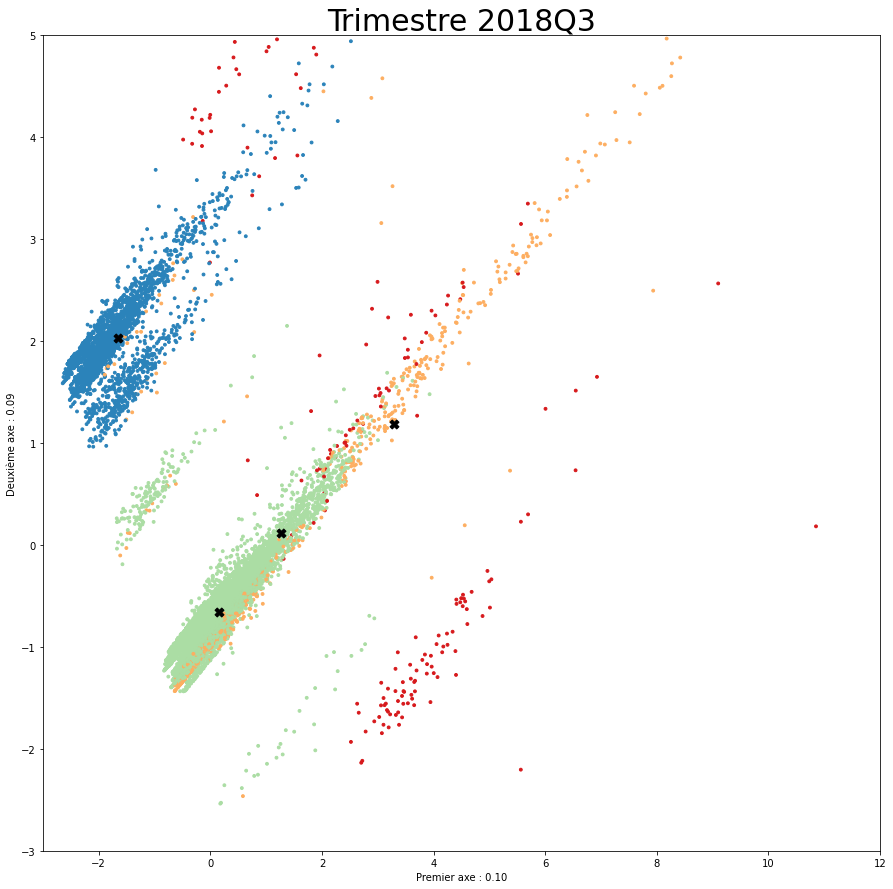

In [14]:
# visualisation des trimestres avec l'ACP du 2ème trimestre de 2018


ref = "2018Q2"
ref_df = dict_clustered_quarters[ref]
scaled_data = scaler.fit_transform(ref_df.iloc[:,:-1])
pca = decomposition.PCA(n_components=2)
pca.fit(scaled_data)
for key, df in dict_clustered_quarters.items():
    scaled_data = scaler.transform(df.iloc[:,:-1])
    data_pca = pca.transform(scaled_data)
    ratios = pca.explained_variance_ratio_
    fig = plt.figure(figsize=(15,15))
    plt.scatter(data_pca[:, 0], data_pca[:, 1], c=df.iloc[:,-1].replace(dict_colors), s=8)
    centr_norm = scaler.transform(dict_centroids_quarters[key])
    centr_pca = pca.transform(centr_norm)
    plt.scatter(centr_pca[:, 0], centr_pca[:, 1], c='k', s=80, marker='X')
    plt.xlabel("Premier axe : %.2f"%(ratios[0]))
    plt.ylabel("Deuxième axe : %.2f"%(ratios[1]))
    plt.title(f"Trimestre {key}", fontsize=30)
    plt.xlim((-3,12))
    plt.ylim((-3,5))
    plt.savefig(f"img/{key}.png")
    plt.show()

In [15]:
# migrations entre clusters

quarters = list(dict_clustered_quarters.keys())
quarters = sorted(quarters)

for i in range(1, len(quarters)):
    first = quarters[i-1]
    second = quarters[i]
    first_df = dict_clustered_quarters[first]
    second_df = dict_clustered_quarters[second]
    regulars = set(first_df.index) & set(second_df.index)
    same = 0
    different = 0
    for cust in regulars :
        first_cluster = first_df.loc[cust, "cluster"]
        second_cluster = second_df.loc[cust, "cluster"]
        if first_cluster == second_cluster:
            same += 1
        else:
            different += 1
    print(f"de {first} à {second}")
    print(f"{same} sont restés dans le même cluster")
    print(f"{different} ont changé de cluster\n")

de 2016Q4 à 2017Q1
1 sont restés dans le même cluster
0 ont changé de cluster

de 2017Q1 à 2017Q2
32 sont restés dans le même cluster
16 ont changé de cluster

de 2017Q2 à 2017Q3
62 sont restés dans le même cluster
27 ont changé de cluster

de 2017Q3 à 2017Q4
86 sont restés dans le même cluster
46 ont changé de cluster

de 2017Q4 à 2018Q1
85 sont restés dans le même cluster
45 ont changé de cluster

de 2018Q1 à 2018Q2
134 sont restés dans le même cluster
55 ont changé de cluster

de 2018Q2 à 2018Q3
74 sont restés dans le même cluster
28 ont changé de cluster



# Performance des algorithmes de classification  (ajout de nouveaux clients)

In [16]:
# séparation en train et test set

X_train, X_test, y_train, y_test = model_selection.train_test_split(data.iloc[:,:-1], data.iloc[:,-1], 
                                                                    test_size=0.3)
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [17]:
%time

# régression logistique

log_reg = linear_model.LogisticRegression()
log_reg.fit(scaled_X_train, y_train)
log_reg.score(scaled_X_test, y_test)

CPU times: user 1 µs, sys: 1e+03 ns, total: 2 µs
Wall time: 5.01 µs


/home/samuel/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9986249570299072

In [18]:
%time

# kNN

kNN = neighbors.KNeighborsClassifier()
kNN.fit(scaled_X_train, y_train)
kNN.score(scaled_X_test, y_test)

CPU times: user 16 µs, sys: 16 µs, total: 32 µs
Wall time: 7.87 µs


0.9927810244070128

In [19]:
%time

# random forest

rf = ensemble.RandomForestClassifier()
rf.fit(scaled_X_train, y_train)
rf.score(scaled_X_test, y_test)

CPU times: user 1 µs, sys: 2 µs, total: 3 µs
Wall time: 5.96 µs


0.9977655551735992